De forma a demonstrar o funcionamento da biblioteca Seaborn,
 será usado um dos ficheiros de dados incluídos no material da unidade (dados meteorológicos das temperaturas médias observadas por mês).

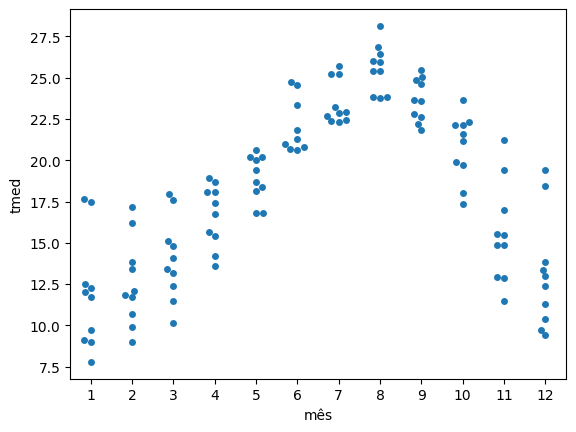

In [3]:
# Carregar as bibliotecas NumPy e Pandas
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
	# Carregar Matplotlib e Seaborn
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
	# Carregar dados meteorológicos
meteo_mes = pd.read_csv('temperature.csv', sep = ',')
	# Ver as temperaturas por mês
sns.swarmplot(x='mês', y='tmed', data=meteo_mes)
plt.show()

Ao trabalhar com um novo conjunto de dados, é comum começar por examinar as várias medidas descritivas da distribuição, como média, desvio padrão, mínimos e máximos, etc. Para se obter uma visualização gráfica da distribuição dos dados, pode-se usar o método sns.distplot().

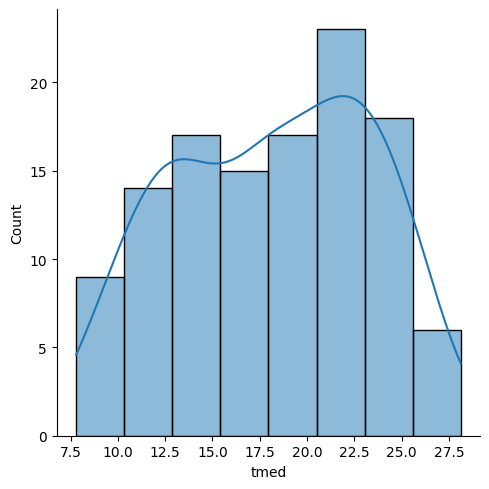

In [4]:
sns.displot(meteo_mes['tmed'], kde=True, rug=False)
plt.show()

Pode-se omitir o estimador de densidade com a opção 'kde = False'. Também é possível adicionar marcadores para ver o número de observações para cada valor no eixo X com a opção 'rug = True'.

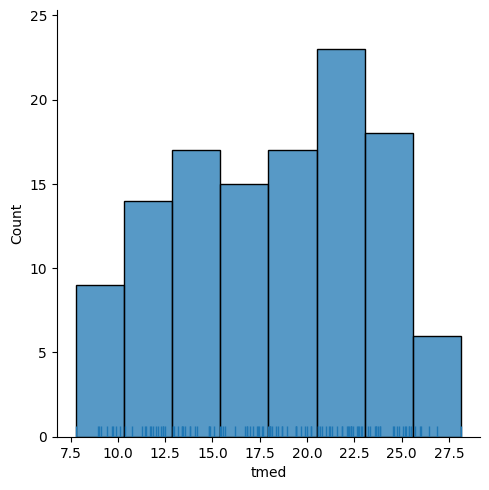

In [5]:
sns.displot(meteo_mes['tmed'], kde=False, rug=True)
plt.show()

Outra forma de ver a distribuição de uma variável é através de um diagrama de caixa ou boxplot.

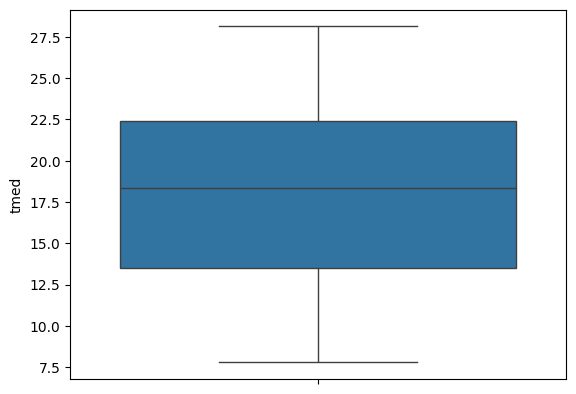

In [6]:
sns.boxplot(y='tmed', data=meteo_mes)
plt.show()

Depois de examinar as variáveis em separado, tipicamente interessa ver se há interações ou dependências entre pares de variáveis. Quando ambas as variáveis são contínuas, pode-se usar um gráfico de dispersão (scatter plot). No Seaborn, para gerar um gráfico de dispersão, é usado o método sns.jointplot().

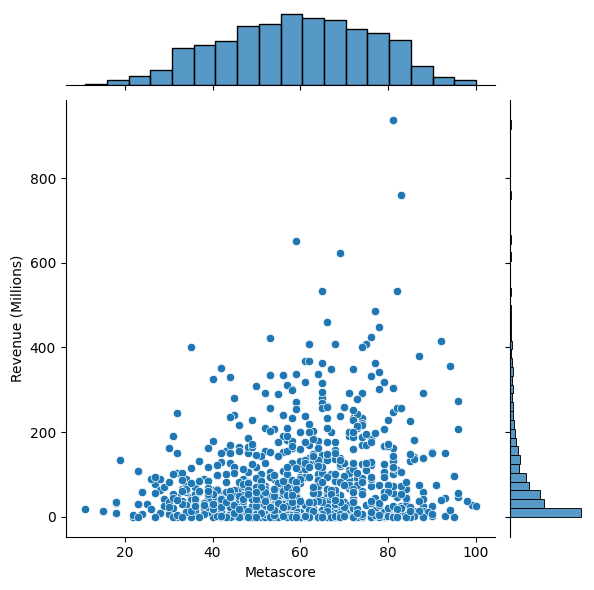

In [7]:
# Carregar os dados cinematográficos 
movies = pd.read_csv('IMDB_movies.csv')
	# Ver a relação entre a pontuação e as receitas de cada filme
sns.jointplot(x='Metascore', y='Revenue (Millions)', data=movies)
plt.show()

O Seaborn permite aplicar operações de filtragem sobre os dados, o que é útil no sentido de remover alguns valores que possam estar a distorcer a análise.

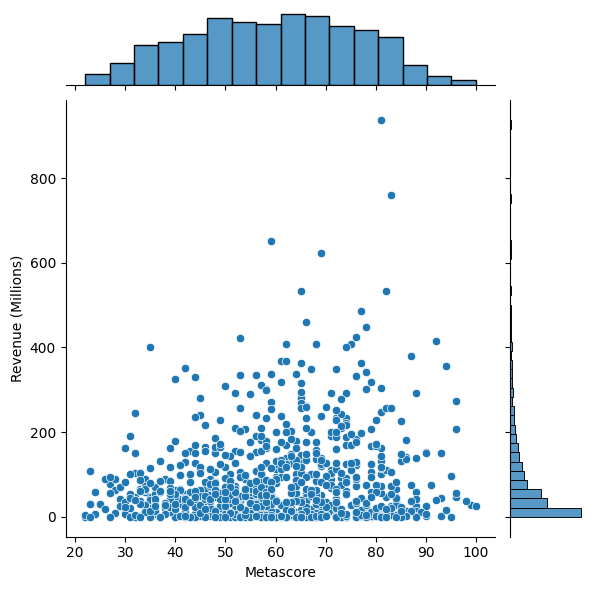

In [8]:
# Manter os filmes que possuem dados de "Pontuação" superior a 20
movies_m = movies.loc[movies['Metascore'] > 20, ['Metascore','Revenue (Millions)']]
	# Ver a relação entre a pontuação e as receitas de cada filme
sns.jointplot(x='Metascore', y='Revenue (Millions)', data=movies_m)
plt.show()

É possível exibir densidades de probabilidade estimadas em vez das observações e histogramas.

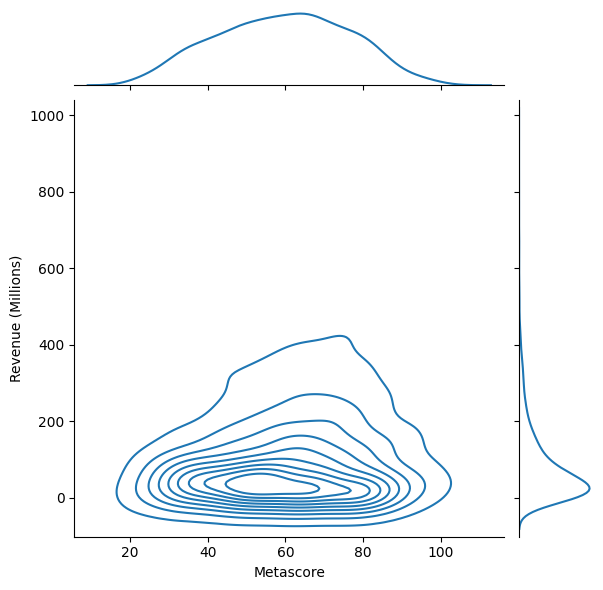

In [9]:
sns.jointplot(x='Metascore', y='Revenue (Millions)', data=movies_m, kind='kde')
plt.show()

Uma vez identificada uma possível interação entre variáveis, pode-se estimar e desenhar um modelo ajustado às observações.

O método sns.regplot(), além de exibir os pontos para cada observação, também ajusta um modelo de regressão linear e traça a linha correspondente ao ajuste com o intervalo de confiança em 95%. Para omitir este ajuste linear, basta incluir a opção 'fit_reg=False'.

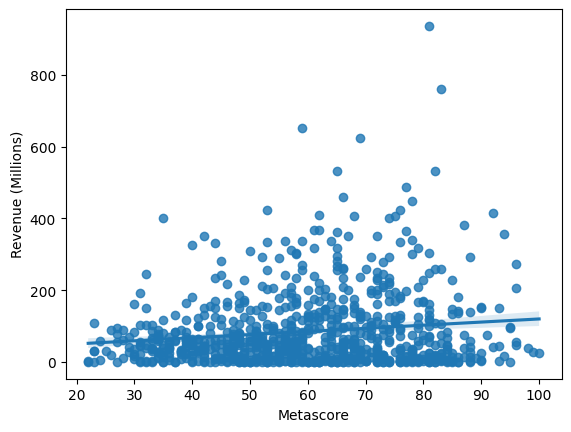

In [10]:
sns.regplot(x='Metascore', y='Revenue (Millions)', data=movies_m)
plt.show()

No primeiro exemplo, verificou-se uma forma de representar 
as observações de uma variável contínua em função de uma categórica usando sns.swarmplot(). Abaixo serão demonstradas outras opções com o mesmo objetivo.

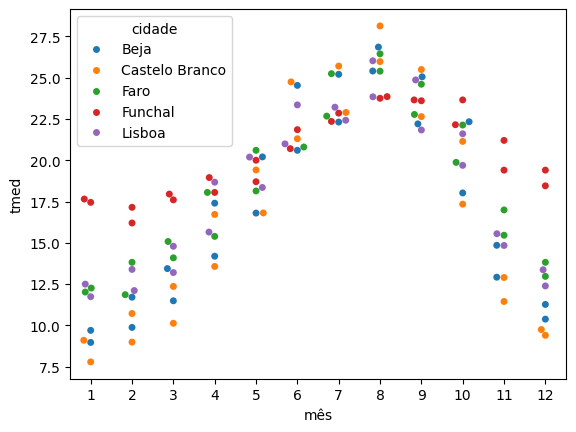

In [11]:
# Carregar dados meteorológicos
meteo_mes = pd.read_csv('temperature.csv', sep = ',')
	# Ver as temperaturas por mês/cidade
sns.swarmplot(x='mês', y='tmed', data=meteo_mes, hue='cidade')
plt.show()

Na prática, repetiu-se o primeiro gráfico de temperaturas mensais, mas agora colorindo os pontos com base na cidade (hue='city').

Da mesma forma que se pode usar um boxplot para ver a distribuição de uma variável, é igualmente possível ver a distribuição por níveis ou categorias.

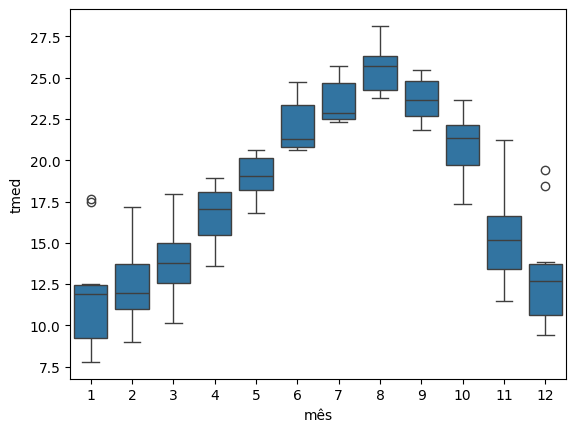

In [12]:
sns.boxplot(x='mês', y='tmed', data=meteo_mes)
plt.show()

Também se pode dividir por outra variável categórica usando 'hue'.

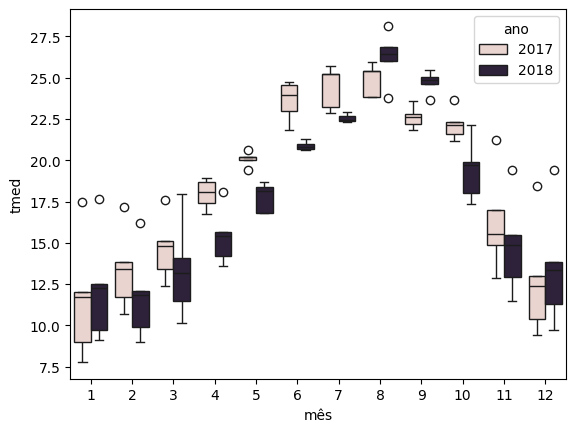

In [13]:
sns.boxplot(x='mês', y='tmed', hue='ano', data=meteo_mes)
plt.show()

Outra forma de ver a distribuição de uma variável dependente de diferentes fatores ou categorias é através de um gráfico de violino. Nestes gráficos, em vez de se representar medidas de posição da distribuição, é apresentada uma estimativa da função de densidade.

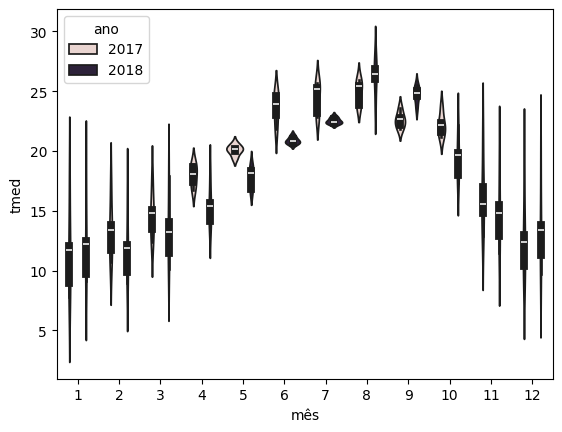

In [14]:
sns.violinplot(x='mês', y='tmed', hue='ano', data=meteo_mes)
plt.show()

Em vez de exibir violinos independentes para cada categoria de cor (ano), pode-se dividir cada violino e aplicar um nível a cada metade, usando o argumento 'split=True'.

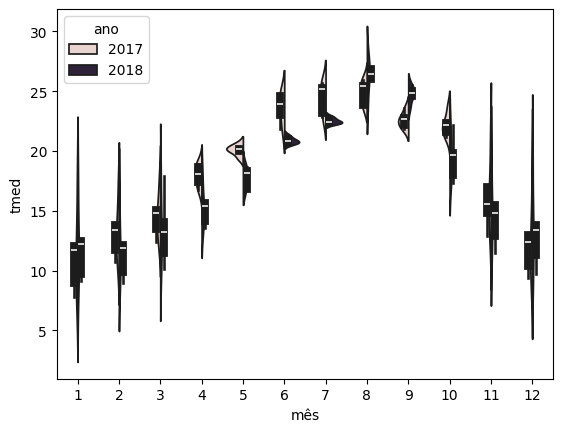

In [15]:
sns.violinplot(x='mês', y='tmed', hue='ano', split=True, data=meteo_mes)
plt.show()

Por último, outra forma de comparar valores entre categorias é utilizando gráficos de barras. Para isso existe o método sns.barplot(), que mostra um indicador estatístico agregado das observações para cada categoria (por padrão, calcula a média).

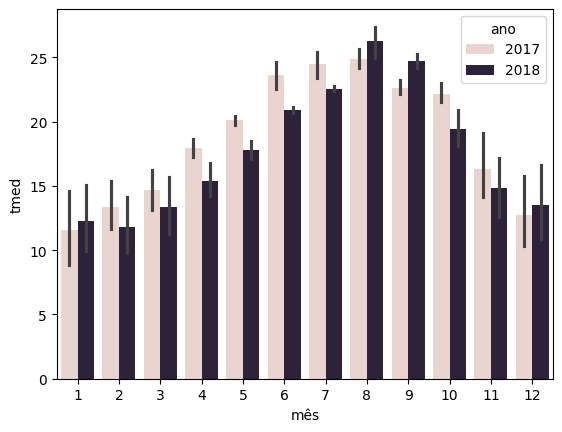

In [16]:
sns.barplot(x='mês', y='tmed', hue='ano', data=meteo_mes)
plt.show()

Para isso, usam-se diversos gráficos organizados em grelhas. No Seaborn, esta organização é feita por meio de um objeto sns.FacetGrid

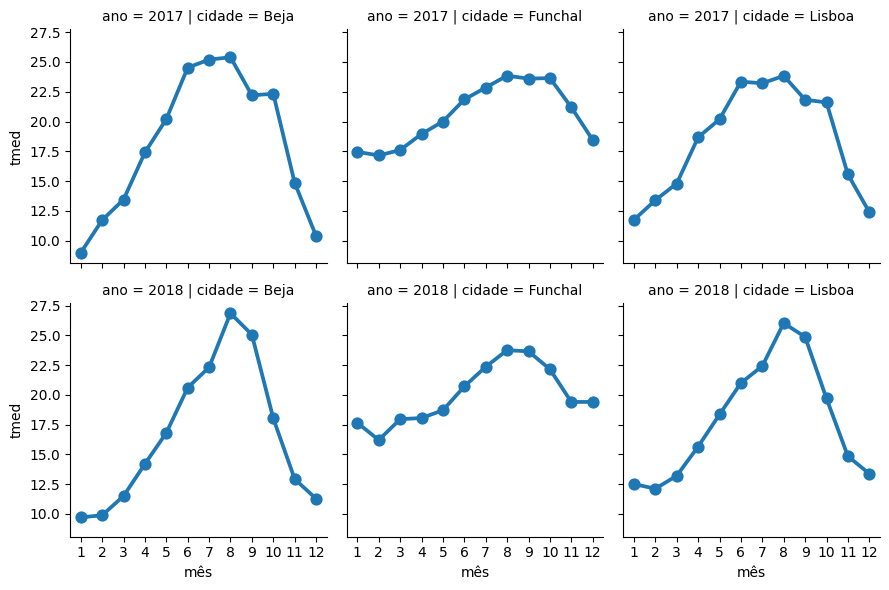

In [17]:
# Selecionar dados de algumas cidades
meteo_blf = meteo_mes[meteo_mes['cidade'].isin(['Beja','Lisboa','Funchal'])]
	# Desenhar uma grelha com tantas linhas quantos os anos
	# e tantas colunas quantas as cidades;
	# Cada painel inclui um gráfico de pontos de temperatura por mês
sns.FacetGrid(meteo_blf, row='ano', col='cidade').map(sns.pointplot, 'mês', 'tmed', order=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

Com o método sns.FacetGrid, é possível definir uma grelha com tantas linhas quantos os anos e tantas colunas quantas as cidades. Em cada célula da grelha é aplicada, com map, a função gráfica que se pretende representar. Neste caso, é criado um gráfico de pontos – (sns.pointplot – da temperatura média para cada mês.

Ao desenhar diretamente o objeto sns.FacetGrid, este mostra a grelha com as células sem dados.

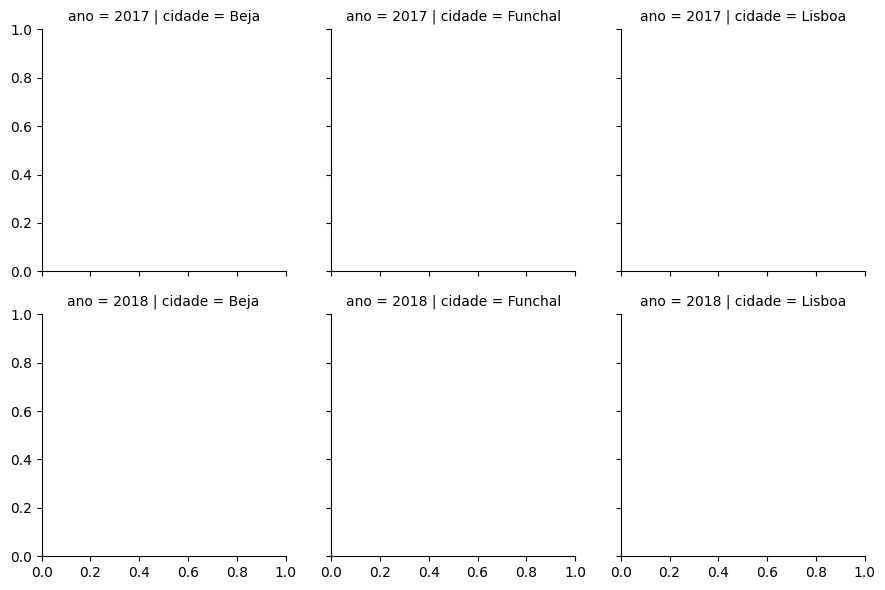

In [18]:
sns.FacetGrid(meteo_blf, row='ano', col='cidade')
plt.show()

Pode-se usar a cor (ou a forma dos pontos) para representar dimensões adicionais dos dados.

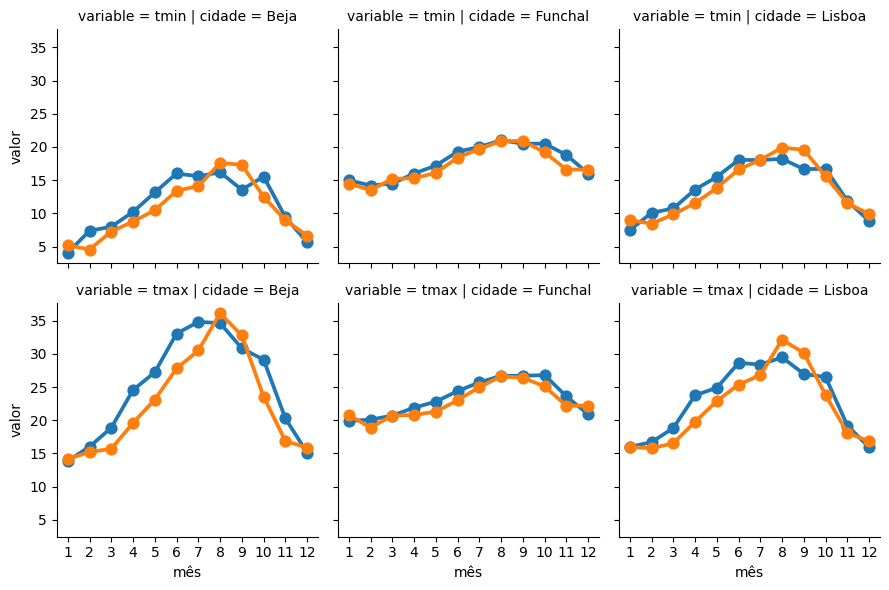

In [19]:
# Usar o método 'pd.melt' para reestruturar o DataFrame,
	# passando de um formato 'wide' para 'long'.
meteo_blf_long = pd.melt(meteo_blf, 
	                         id_vars=['ano','mês','cidade'], 
	                         value_vars=['tmin','tmax'], 
	                         var_name='variable', value_name='valor')
	# Em cada linha da grelha, representar uma variável meteorológica
	# e com a cor representar o ano
sns.FacetGrid(meteo_blf_long, row='variable', col='cidade', hue='ano').map(sns.pointplot, 'mês', 'valor', order=[1,2,3,4,5,6,7,8,9,10,11,12])
plt.show()

O Seaborn inclui cinco temas gráficos predefinidos, com diferentes configurações de estilo para usar diretamente com as figuras, os quais estão listados na tabela abaixo.

darkgrid
whitegrid
dark
white
ticks

Estes temas ajustam os elementos gráficos, como cor de fundo, linhas guia, eixos e marcas, legenda, etc. Para especificar que tema aplicar, usa-se o método sns.set_style().

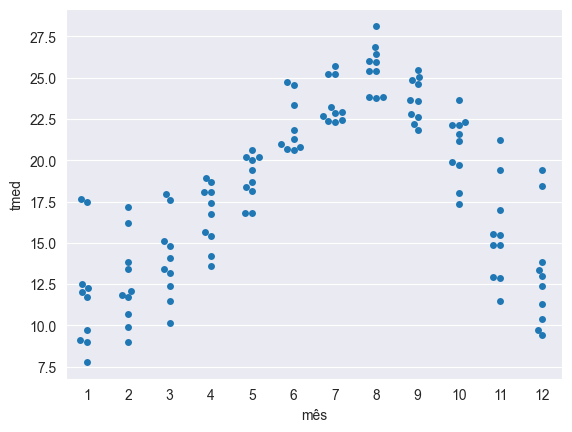

In [20]:
sns.set_style('darkgrid')
sns.swarmplot(x='mês', y='tmed', data=meteo_mes)
plt.show()

Sobre um tema pode-se introduzir ajustes pessoais. O método sns.set_style() permite passar um dicionário com configurações de elementos particulares do gráfico.

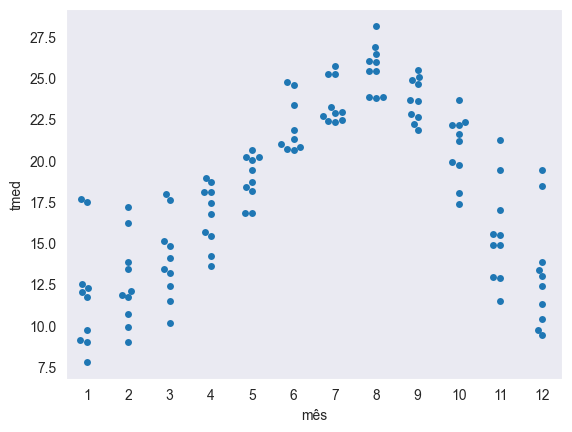

In [21]:
sns.set_style('darkgrid', rc = {'axes.grid': False})
sns.swarmplot(x='mês', y='tmed', data=meteo_mes)
plt.show()

Pode-se consultar a configuração atual com sns.axes_style().

In [22]:
sns.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': <CapStyle.round: 'round'>,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

Dependendo do contexto em que se pretende integrar os gráficos, pode ser necessário ajustar o seu tamanho. Uma forma de o fazer é através do método set_size_inches().

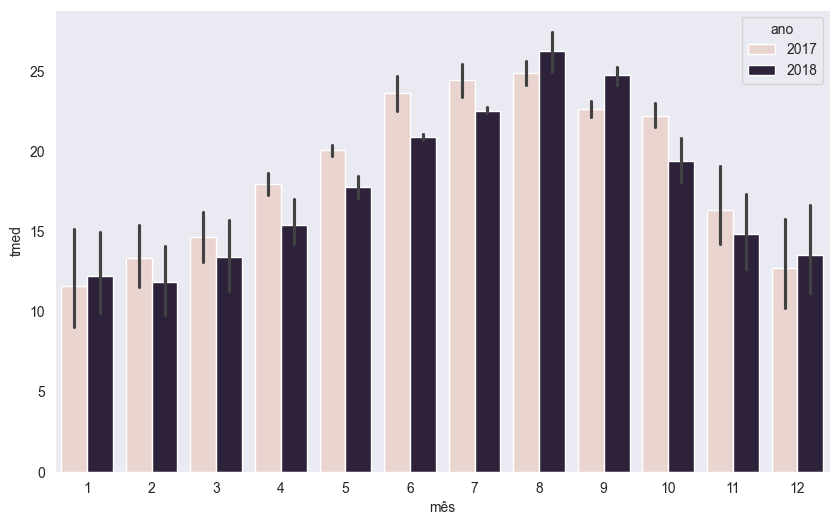

In [23]:
sns.barplot(x='mês', y='tmed', hue='ano', data=meteo_mes).figure.set_size_inches(10,6)
plt.show()

O Seaborn também permite definir a paleta de cores que se pretende aplicar aos gráficos. Consoante o tipo de variáveis a representar, algumas paletas podem adaptar-se melhor que outras.

Para selecionar a paleta de cores, usa-se o método sns.color_palette() ou uma das suas derivadas.

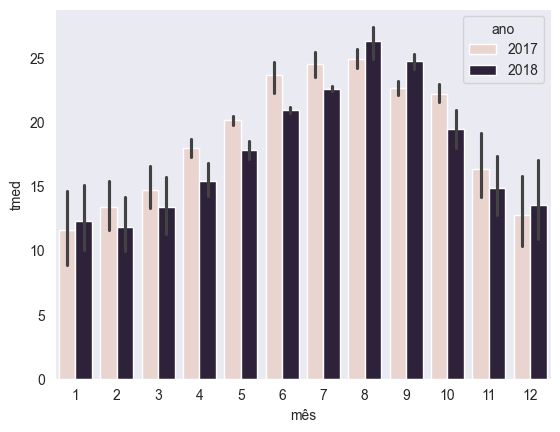

In [25]:
# Selecionar duas cores da paleta "husl"
with sns.color_palette("husl", 2): 
    sns.barplot(x='mês', y='tmed', hue='ano', data=meteo_mes)
plt.show()

Também é possível definir manualmente as cores com sns.xkcd_palette().

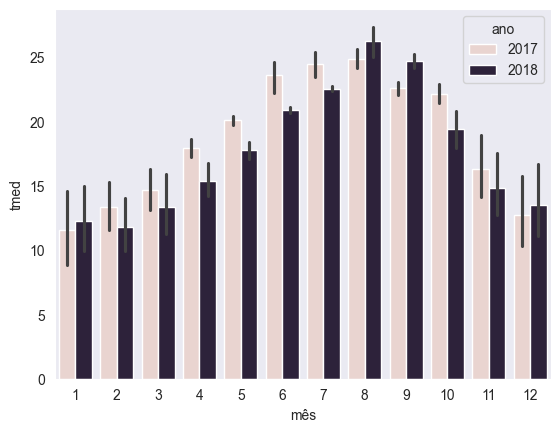

In [ ]:
with sns.xkcd_palette(["red","blue"]): 
	    sns.barplot(x='mês', y='tmed', hue='ano', data=meteo_mes)
plt.show()

Ao mostrar uma variável contínua, interessam paletas que variam a cor gradualmente, seja por matiz, luminosidade, saturação, etc.

O método sns.light_palette() cria uma escala a partir de uma cor base, graduando a saturação.

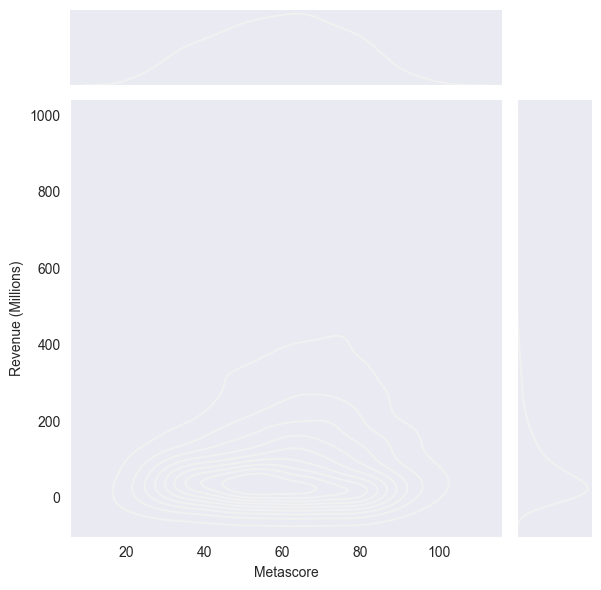

In [27]:
with sns.light_palette('grey', input='xkcd'):
	    sns.jointplot(x='Metascore', y='Revenue (Millions)', data=movies_m, kind='kde')
plt.show()

Para aumentar o contraste, pode-se usar sns.cubehelix_palette(). Este método cria uma paleta, graduando a matiz e o brilho.

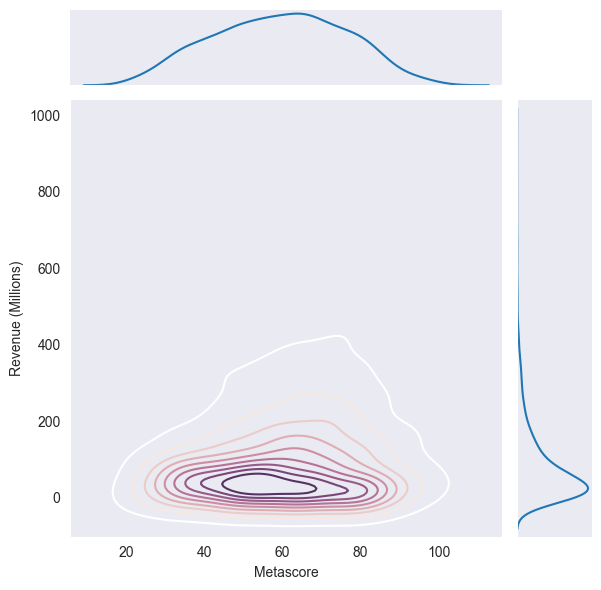

In [29]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.jointplot(x='Metascore', y='Revenue (Millions)', data=movies_m, kind='kde', cmap=cmap)
plt.show()

Para definir o título de um gráfico simples, usa-se o método set_title().

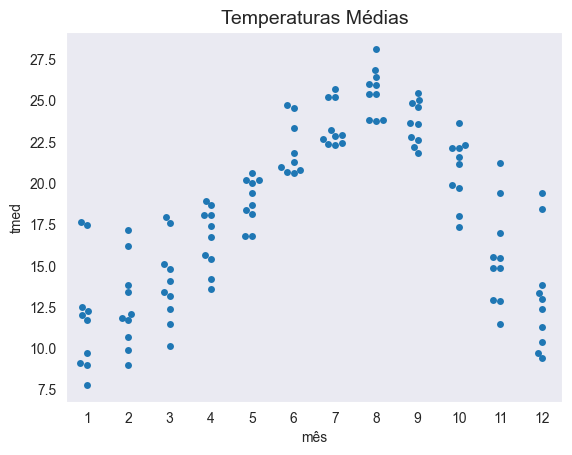

In [30]:
sns.swarmplot(x='mês', y='tmed', data=meteo_mes).set_title('Temperaturas Médias', fontsize=14)
plt.show()

Da mesma forma, para modificar os rótulos de cada um dos eixos, usa-se o método set(), indicando os valores para xlabel e ylabel.



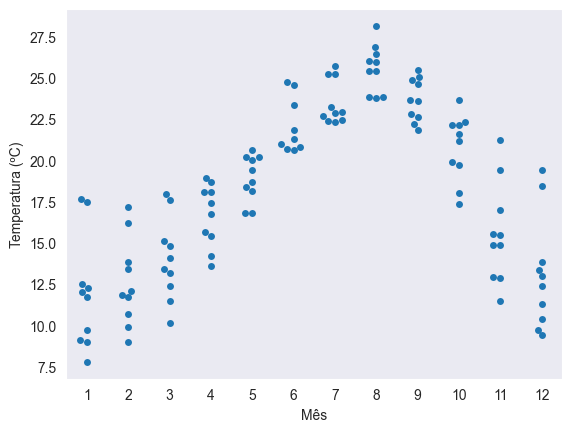

In [31]:
sns.swarmplot(x='mês', y='tmed', data=meteo_mes).set(xlabel='Mês', ylabel='Temperatura (ºC)')
plt.show()